<a href="https://colab.research.google.com/github/Mahasaad94/ML-test/blob/main/license-plate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!git clone https://github.com/quangnhat185/Plate_detect_and_recognize.git


Cloning into 'Plate_detect_and_recognize'...
remote: Enumerating objects: 180, done.
remote: Total 180 (delta 0), reused 0 (delta 0), pack-reused 180
Receiving objects: 100% (180/180), 50.59 MiB | 33.38 MiB/s, done.
Resolving deltas: 100% (69/69), done.


In [13]:
!pwd



/content/yolov5


In [16]:
!cd ..

In [18]:
!pwd


/content/yolov5/Plate_detect_and_recognize


In [20]:
!cd ..

In [22]:
cd /content

/content


In [23]:
!git clone https://github.com/quangnhat185/Plate_detect_and_recognize.git


Cloning into 'Plate_detect_and_recognize'...
remote: Enumerating objects: 180, done.
remote: Total 180 (delta 0), reused 0 (delta 0), pack-reused 180
Receiving objects: 100% (180/180), 50.59 MiB | 33.34 MiB/s, done.
Resolving deltas: 100% (69/69), done.


In [24]:
cd Plate_detect_and_recognize/

/content/Plate_detect_and_recognize


In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from local_utils import detect_lp
from os.path import splitext,basename
from keras.models import model_from_json
import glob

In [26]:

def load_model(path):
    try:
        path = splitext(path)[0]
        with open('%s.json' % path, 'r') as json_file:
            model_json = json_file.read()
        model = model_from_json(model_json, custom_objects={})
        model.load_weights('%s.h5' % path)
        print("Loading model successfully...")
        return model
    except Exception as e:
        print(e)

In [27]:
wpod_net_path = "wpod-net.json"
wpod_net = load_model(wpod_net_path)

Loading model successfully...


In [28]:

def preprocess_image(image_path,resize=False):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255
    if resize:
        img = cv2.resize(img, (224,224))
    return img

In [29]:
# Create a list of image paths 
image_paths = glob.glob("Plate_examples/*.jpg")
print("Found %i images..."%(len(image_paths)))

Found 18 images...


In [30]:

def get_plate(image_path, Dmax=608, Dmin=256):
    vehicle = preprocess_image(image_path)
    ratio = float(max(vehicle.shape[:2])) / min(vehicle.shape[:2])
    side = int(ratio * Dmin)
    bound_dim = min(side, Dmax)
    _ , LpImg, _, cor = detect_lp(wpod_net, vehicle, bound_dim, lp_threshold=0.5)
    return LpImg, cor



In [31]:
test_image = image_paths[1]
LpImg,cor = get_plate(test_image)
print("Detect %i plate(s) in"%len(LpImg),splitext(basename(test_image))[0])
print("Coordinate of plate(s) in image: \n", cor)

Detect 1 plate(s) in india_motor_plate
Coordinate of plate(s) in image: 
 [array([[458.6310479 , 841.3061183 , 892.51917119, 509.84410078],
       [727.66053588, 621.04838308, 805.67042635, 912.28257916],
       [  1.        ,   1.        ,   1.        ,   1.        ]])]


Detect 1 plate(s) in mytest
Coordinate of plate(s) in image: 
 [array([[453.45131424, 674.5487995 , 678.41423666, 457.3167514 ],
       [581.63675889, 564.68579838, 688.42184011, 705.37280062],
       [  1.        ,   1.        ,   1.        ,   1.        ]])]


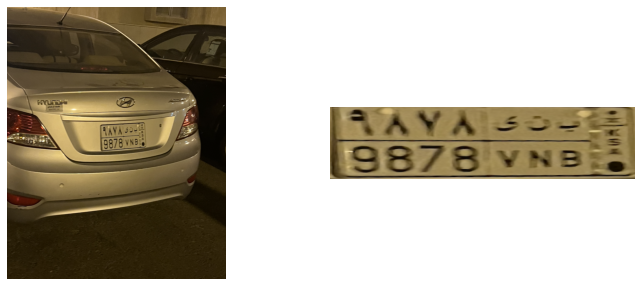

In [32]:
test_image = '/content/mytest.png'
LpImg,cor = get_plate(test_image)
print("Detect %i plate(s) in"%len(LpImg),splitext(basename(test_image))[0])
print("Coordinate of plate(s) in image: \n", cor)

# Visualize our result
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.axis(False)
plt.imshow(preprocess_image(test_image))
plt.subplot(1,2,2)
plt.axis(False)
plt.imshow(LpImg[0])

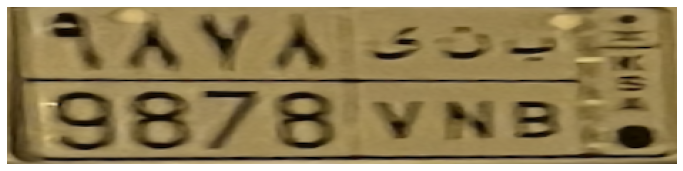

In [33]:
fig = plt.figure(figsize=(12,6))


LpImg,_ = get_plate("/content/mytest.png")
plt.axis(False)
plt.imshow(LpImg[0])
plt.savefig("car21.png")




In [23]:
if (len(LpImg)): #check if there is at least one license image
    # Scales, calculates absolute values, and converts the result to 8-bit.
    plate_image = cv2.convertScaleAbs(LpImg[0], alpha=(255.0))
    
    # convert to grayscale and blur the image
    gray = cv2.cvtColor(plate_image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(7,7),0)
    
    # Applied inversed thresh_binary 
    binary = cv2.threshold(blur, 180, 255,
                        cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    
    kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    #thre_mor = cv2.morphologyEx(binary, cv2.MORPH_DILATE, kernel3)

In [34]:
cd /content

/content


In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 13151, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 13151 (delta 13), reused 20 (delta 10), pack-reused 13122
Receiving objects: 100% (13151/13151), 12.54 MiB | 30.00 MiB/s, done.
Resolving deltas: 100% (9026/9026), done.
/content/yolov5
     |████████████████████████████████| 596 kB 4.7 MB/s 
     |████████████████████████████████| 67 kB 3.6 MB/s 
     |████████████████████████████████| 1.1 MB 30.1 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 145 kB 73.3 MB/s 
     |████████████████████████████████| 21.6 MB 1.2 MB/s 
     |████████████████████████████████| 138 kB 46.1 MB/s 
     |████████████████████████████████| 178 kB 73.2 MB/s 
     |████████████████████████████████| 4.3 MB 42.2 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
ERROR: pip's dependency resolver does not currently take into acc

In [2]:
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

In [35]:
cd yolov5

/content/yolov5


In [4]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [5]:

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="1FoxZy4mcOvJ0jgIRQf1")
project = rf.workspace("last-zmuka").project("english-part-z0xjt")
dataset = project.version(1).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to English-part-1 in yolov5pytorch:: 100%|██████████| 1008/1008 [00:00<00:00, 1659.71it/s]


In [6]:
os.environ["DATASET_DIRECTORY"] = "/content/yolov5/English-part-1"

In [7]:
!python train.py --img 416 --batch 16 --epochs 150 --data /content/yolov5/English-part-1/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/English-part-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (Docker image), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 v6.1-324-g0b5ac22 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, ancho

In [38]:
import cv2
img = cv2.imread('/content/Plate_detect_and_recognize/car21.png')
img2 = cv2.resize(img, (416, 416))
img_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

print(img_rgb.shape)
cv2.imwrite("/content/Plate_detect_and_recognize/reshaped.png", img_rgb)

(416, 416, 3)


True

In [39]:

cd ..

SyntaxError: ignored

In [40]:

!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source /content/Plate_detect_and_recognize/reshaped.png --save-crop

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/Plate_detect_and_recognize/reshaped.png, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-324-g0b5ac22 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/Plate_detect_and_recognize/reshaped.png: 416x416 1 english, Done. (0.014s)
Speed: 0.5ms pre-process, 13.9ms inference, 25.3ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp2


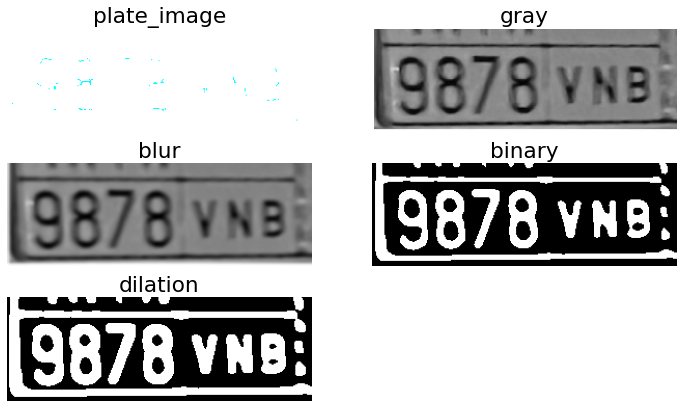

In [42]:
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image

#LpImg,_ = get_plate("/content/mytest.png")
#image22= cv2.imread("/content/yolov5/runs/detect/exp2/crops/english/reshaped.jpg")
#plt.imshow(image22)

#check if there is at least one license image
# Scales, calculates absolute values, and converts the result to 8-bit.
# LpImg,_ = get_plate("/content/yolov5/runs/detect/exp2/crops/english/reshaped.jpg")

#plate_image = cv2.convertScaleAbs(image22, alpha=(255.0))
plate_image2= cv2.imread("/content/yolov5/runs/detect/exp2/crops/english/reshaped.jpg")
fimage= cv2.cvtColor(plate_image2, cv2.COLOR_BGR2RGB)
#plate_image = cv2.convertScaleAbs(fimage, alpha=(255.0))


# convert to grayscale and blur the image
gray = cv2.cvtColor(fimage, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(7,7),0)

# Applied inversed thresh_binary 
binary = cv2.threshold(blur, 180, 255,
                    cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
thre_mor = cv2.morphologyEx(binary, cv2.MORPH_DILATE, kernel3)

fig = plt.figure(figsize=(12,7))
plt.rcParams.update({"font.size":18})
grid = gridspec.GridSpec(ncols=2,nrows=3,figure = fig)
plot_image = [plate_image, gray, blur, binary,thre_mor]
plot_name = ["plate_image","gray","blur","binary","dilation"]

for i in range(len(plot_image)):
    fig.add_subplot(grid[i])
    plt.axis(False)
    plt.title(plot_name[i])
    if i ==0:
        plt.imshow(plot_image[i])
    else:
        plt.imshow(plot_image[i],cmap="gray")

In [43]:










def sort_contours(cnts,reverse = False):
    i = 0
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))
    return cnts

cont, _  = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# creat a copy version "test_roi" of plat_image to draw bounding box
test_roi = fimage.copy()

# Initialize a list which will be used to append charater image
crop_characters = []

# define standard width and height of character
digit_w, digit_h = 30, 60

for c in sort_contours(cont):
    (x, y, w, h) = cv2.boundingRect(c)
    ratio = h/w
    if 1<=ratio<=3.5: # Only select contour with defined ratio
        if h/plate_image.shape[0]>=0.5: # Select contour which has the height larger than 50% of the plate
            # Draw bounding box arroung digit number
            cv2.rectangle(test_roi, (x, y), (x + w, y + h), (0, 255,0), 2)

            # Sperate number and gibe prediction
            curr_num = thre_mor[y:y+h,x:x+w]
            curr_num = cv2.resize(curr_num, dsize=(digit_w, digit_h))
            _, curr_num = cv2.threshold(curr_num, 220, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            crop_characters.append(curr_num)

print("Detect {} letters...".format(len(crop_characters)))

Detect 4 letters...


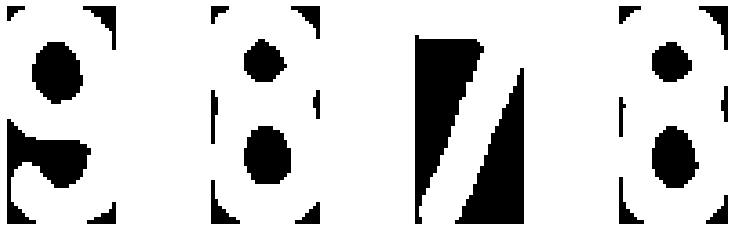

In [44]:

fig = plt.figure(figsize=(14,4))
grid = gridspec.GridSpec(ncols=len(crop_characters),nrows=1,figure=fig)

for i in range(len(crop_characters)):
    fig.add_subplot(grid[i])
    plt.axis(False)
    plt.imshow(crop_characters[i],cmap="gray")

In [49]:
!cd ..

In [50]:
!cd Plate_detect_and_recognize/

In [54]:
cd ..

/content


In [55]:
ls

mytest.png  Plate_detect_and_recognize/  sample_data/  yolov5/


In [56]:
cd Plate_detect_and_recognize/

/content/Plate_detect_and_recognize


In [58]:
from sklearn.preprocessing import LabelEncoder


In [59]:
# Load model architecture, weight and labels
json_file = open('MobileNets_character_recognition.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights("License_character_recognition_weight.h5")
print("[INFO] Model loaded successfully...")

labels = LabelEncoder()
labels.classes_ = np.load('license_character_classes.npy')
print("[INFO] Labels loaded successfully...")

[INFO] Model loaded successfully...
[INFO] Labels loaded successfully...


In [60]:
def predict_from_model(image,model,labels):
    image = cv2.resize(image,(80,80))
    image = np.stack((image,)*3, axis=-1)
    prediction = labels.inverse_transform([np.argmax(model.predict(image[np.newaxis,:]))])
    return prediction

9878


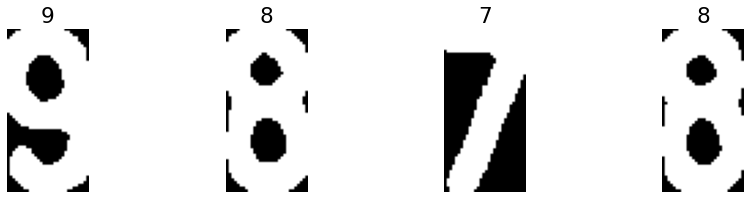

In [61]:
fig = plt.figure(figsize=(15,3))
cols = len(crop_characters)
grid = gridspec.GridSpec(ncols=cols,nrows=1,figure=fig)

final_string = ''
for i,character in enumerate(crop_characters):
    fig.add_subplot(grid[i])
    title = np.array2string(predict_from_model(character,model,labels))
    plt.title('{}'.format(title.strip("'[]"),fontsize=20))
    final_string+=title.strip("'[]")
    plt.axis(False)
    plt.imshow(character,cmap='gray')

print(final_string)
#plt.savefig('final_result.png', dpi=300)